In [147]:
import torch
import torchvision
from torchvision import transforms, datasets

In [150]:
train = datasets.MNIST("", train = True,
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download=False,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [196]:
train[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [47]:
class_name = test.classes
class_name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [50]:
len(test), len(train)

(10000, 60000)

In [60]:
img, label = train[0]
img.shape, img.dtype, label, type(label)

(torch.Size([1, 28, 28]), torch.float32, 5, int)

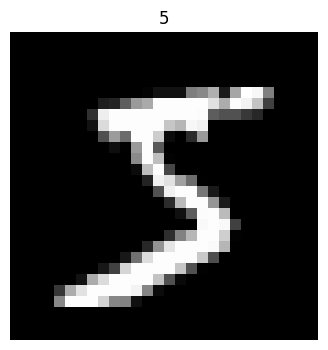

In [61]:
import matplotlib.pyplot as plt
img = img.permute(1,2,0) #-> torch[C,H,W] matplotlib[H,W,C]

plt.figure(figsize=(6,4))
plt.imshow(img, cmap = "gray")
plt.title(label)
plt.axis("off")
plt.show()

In [151]:
trainset = torch.utils.data.DataLoader(train, batch_size = 16, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 16, shuffle=True)

In [152]:
import torch.nn as nn
import torch.nn.functional as F

In [153]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),        
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,10)
        )

    def forward(self,x):
        return  self.model(x)


net = Net().to(device)
print(net)
        

Net(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU()
    (9): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [154]:
for data in trainset:
    x,y = data
    print(y)
    break

tensor([3, 4, 1, 8, 2, 7, 3, 6, 7, 5, 3, 1, 2, 0, 3, 1])


In [161]:
x_o, y_o = data[0][0], data[1][0]
print(y_o)

tensor(3)


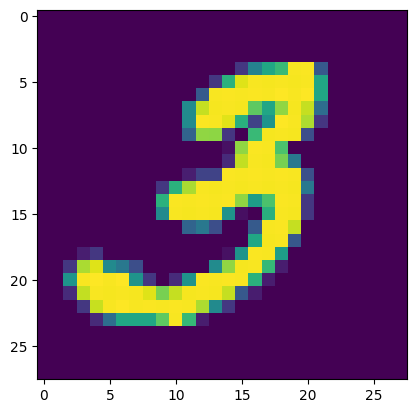

In [163]:
plt.imshow(x_o.view(28,28))

In [164]:
x_o = x_o.view(-1,28*28)

In [165]:
x_o.shape

torch.Size([1, 784])

In [166]:
output = net(x_o.to(device))

In [167]:
print(output.argmax(dim=-1))

tensor([8], device='cuda:0')


In [169]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [172]:
next(iter(net.parameters()))

Parameter containing:
tensor([[ 0.0205, -0.0206,  0.0045,  ...,  0.0114,  0.0158,  0.0102],
        [ 0.0301,  0.0299, -0.0041,  ...,  0.0240,  0.0103, -0.0266],
        [ 0.0325, -0.0063, -0.0168,  ..., -0.0246,  0.0276,  0.0131],
        ...,
        [-0.0175,  0.0184, -0.0281,  ..., -0.0345,  0.0046,  0.0095],
        [-0.0316,  0.0175, -0.0257,  ..., -0.0049,  0.0215,  0.0133],
        [-0.0050,  0.0107, -0.0016,  ...,  0.0161, -0.0011, -0.0102]],
       device='cuda:0', requires_grad=True)

In [173]:
optimizer = torch.optim.SGD(params = net.parameters(),
                           lr = 0.1)
loss = nn.CrossEntropyLoss()

In [174]:
epochs = 5

for epoch in range(epochs):
    train_loss, test_loss = 0 , 0
    net.train()
    for batch in trainset:
        X,y = batch
        X,y = X.to(device), y.to(device)

        # Forward pass
        y_hat = net(X)

        # Loss compute
        batch_loss = loss(y_hat,y)
        train_loss += batch_loss

        optimizer.zero_grad()
        
        # loss backward
        batch_loss.backward()

        # optimizer step
        optimizer.step()

    train_loss /= len(trainset)
    print(f"epoch - {epoch} : training loss - {train_loss:.4f}")

    net.eval()

    for X,y in testset:
        X,y = X.to(device), y.to(device)
        with torch.inference_mode():
            y_pred = net(X)
        test_loss += loss(y_pred,y)
    test_loss /= len(testset)
    print(f"epoch - {epoch} : test loss - {test_loss:.4f}")
       

    

epoch - 0 : training loss - 0.4231
epoch - 0 : test loss - 0.2007
epoch - 1 : training loss - 0.1311
epoch - 1 : test loss - 0.1083
epoch - 2 : training loss - 0.0960
epoch - 2 : test loss - 0.1166
epoch - 3 : training loss - 0.0748
epoch - 3 : test loss - 0.1026
epoch - 4 : training loss - 0.0625
epoch - 4 : test loss - 0.0809


In [190]:
img, label = next(iter(trainset))
img.shape, label

(torch.Size([16, 1, 28, 28]),
 tensor([4, 2, 6, 3, 6, 0, 6, 6, 0, 6, 8, 9, 2, 9, 5, 6]))

In [191]:
image = img[0]
label = label[0]

print(label)



tensor(4)


In [192]:
image.shape

torch.Size([1, 28, 28])

In [193]:
image = image.to(device)
image_pred = net(image)
image_pred

tensor([[-2.1753, -0.6599, -0.2093, -4.1722,  7.4725,  0.6593, -3.4672,  2.6361,
         -2.0508,  3.7872]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [194]:
image_pred.argmax()

tensor(4, device='cuda:0')